In [18]:
import numpy as np
t = np.load(r"W:\music\mfm\MFM_Synthsizer\data\cello\sustain\table\37.npz",allow_pickle=True)

In [19]:
for k, v in t.items():
    print(k, v.shape)

sampleRate ()
par_sr ()
ori_sec ()
partialAmount ()
pitch ()
coloredCutoff1 ()
coloredCutoff2 ()
alphaGlobal (30, 278)
alphaLocal.env (30, 2, 278)
alphaLocal.spreadingCenter (30, 2)
alphaLocal.spreadingFactor (30, 2)
alphaLocal.noiseGain (30, 2)
alphaLocal.gain (30,)
totalEnv (278,)
magGlobal (30, 278)
magRatio (30, 278)
magLocal.env (30, 2, 278)
magLocal.spreadingCenter (30, 2)
magLocal.spreadingFactor (30, 2)
magLocal.noiseGain (30, 2)
magLocal.gain (30,)
attackLen ()
releaseLen ()
overlapLen ()
alphaAttack (0,)
alphaRelease (0,)
magAttack (0,)
magRelease (0,)
attackWave (1, 5292)


C:\Users\User\AppData\Local\Temp\ipykernel_61276\2515052186.py:4: MatplotlibDeprecationWarning: Passing label as a length 30 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(t['alphaGlobal'].transpose()[:180][2], label=list(range(1,31)))


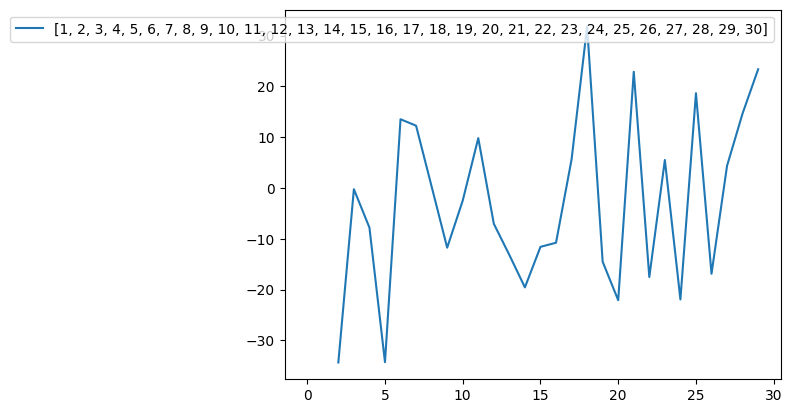

In [ ]:
import matplotlib.pyplot as plt
t = np.load(r"W:\music\mfm\MFM_Synthsizer\data\cello\sustain\table\37.npz",allow_pickle=True)
# plot magratio
plt.plot(t['alphaGlobal'].transpose()[:180], label=list(range(1,31)))
plt.legend()
plt.show()


In [72]:
# Check if alphaGlobal contains any NaN values
has_nan = np.isnan(t['alphaGlobal']).any()
print(f"Contains NaN values: {has_nan}")

# Display the shape and a sample of the data
print(f"Shape: {t['alphaGlobal'].shape}")
print("First few values:")
print(t['alphaGlobal'][:2])  # Show first 2 rows, first 5 columns

Contains NaN values: True
Shape: (30, 278)
First few values:
[[  14.004216    15.496527    17.173063    19.065254    21.024336
    22.733324    23.86882     24.316664    24.256107    24.027859
    23.90046     23.934902    24.034634    24.090975    24.076725
    24.032122    24.000675    23.992949    23.996796    24.00114
    24.004047    24.006832    24.009394    24.011335    24.012835
    24.01273     24.00815     23.997883    23.985086    23.974623
    23.967756    23.961313    23.952515    23.943127    23.9376
    23.93785     23.94156     23.945782    23.950422    23.956608
    23.962322    23.961933    23.95153     23.93415     23.91848
    23.91178     23.91447     23.921682    23.929033    23.935917
    23.943811    23.95316     23.96288     23.971785    23.97881
    23.981804    23.978022    23.967602    23.95624     23.95256
    23.961308    23.978798    23.995502    24.003498    24.001942
    23.996145    23.992136    23.992239    23.99519     23.999355
    24.00516     24.0

In [775]:
from pathlib import Path
import soundfile as sf
from matplotlib import pyplot as plt
import librosa
import numpy as np

from data_proc.split import detect_onsets

audio, sr = librosa.load(r'.\data\151VNNVM.WAV')
onsets = detect_onsets(audio,n_fft=64,visualize=True)

segments = np.split(audio,onsets)[1:]

# trim end of segments
segments = [s[:-4000] for s in segments]

# save segments
Path('./data/audio').mkdir(parents=True,exist_ok=True)
for i,s in enumerate(segments[0:13] + segments[19:26] + segments[32:39] + segments[45:]):
    sf.write(f'./data/audio/{55+i}.wav',s,sr)

In [513]:
np.argmin([len(s) for s in segments])

56

In [782]:
pitch = 55
base_freq = 440 * np.power(2, (pitch-69)/12)
print(base_freq)

195.99771799087463


In [776]:
np.savez('./data/table.npz',a={'a1':np.array([1,2,3])})


In [780]:
np.load('./data/table.npz',allow_pickle=True)['a']

array({'a1': array([1, 2, 3])}, dtype=object)

In [546]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

freq_to_midi(439)

69

67

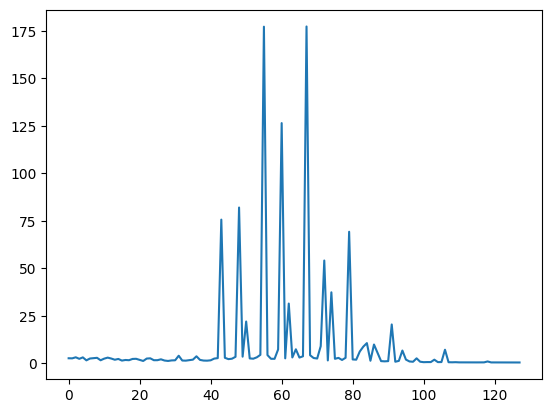

In [756]:
def freq_to_midi(freq):
    return int(np.round(69 + 12 * np.log2(freq / 440)))

def midi_to_freq(midi):
    return 440 * 2 ** ((midi - 69) / 12)

def get_first_peak(seq):
    m = np.max(seq)
    for i,s in enumerate(seq):
        if i < 3 or i == len(seq)-1:
            continue
        if s > m*0.5:
            if seq[i-1] < s and seq[i+1] < s:
                return i
    raise Exception('No peak found')

def get_base_freq(audio,sr):
    audio = audio[:40000]
    fft_freqs = np.fft.rfftfreq(len(audio),1/sr)    
    freq_signal = np.abs(np.fft.rfft(audio))
    fft_freqs_step = fft_freqs[1]-fft_freqs[0]

    # plt.plot(fft_freqs,freq_signal)
    counts = np.zeros(128)
    for pitch in range(128):
        for n in range(5):
            decay = 0.9**n
            bin = int(midi_to_freq(pitch)*n / fft_freqs_step)
            if bin < 0 or bin >= len(freq_signal):
                continue
            counts[pitch] += freq_signal[bin]*decay

    plt.plot(counts)

    return np.argmax(counts)


def get_pitch(audio,sr):
    return freq_to_midi(get_base_freq(audio,sr))

get_base_freq(segments[0],sr)

In [732]:
midi_to_freq(101)

2793.825851464031

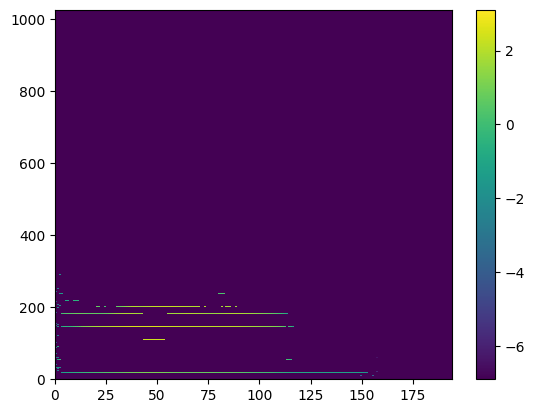

In [565]:
plt.pcolormesh(np.log(0.001+librosa.core.piptrack(y=segments[0],sr=sr,fmin=100,fmax=10000)[1]))
plt.colorbar()
